# **REGRESSION ANALYSIS**

#### Purpose
This report utilizes the Air Quality and Health Impact dataset from Kaggle to perform a comprehensive classification analysis. The dataset provides detailed information on various pollutants such as PM2.5, PM10, NO2, SO2, CO, and O3, along with their potential health impacts. By analyzing this dataset, we seek to identify patterns and anomalies in air quality, assess the effectiveness of current pollution control measures, and provide actionable insights for policymakers and public health officials to improve air quality management.

#### Variables
1. AQI: A measure used to communicate how polluted the air currently is or how polluted it is forecast to become.
2. PM2.5: Concentration of particulate matter with a diameter of 2.5 micrometers or less.
3. M10: Concentration of particulate matter with a diameter of 10 micrometers or less.
4. NO2: Concentration of nitrogen dioxide.
5. SO2: Concentration of sulfur dioxide.
6. CO: Concentration of carbon monoxide.
7. O3: Concentration of ozone.
8. Temperature: The temperature at the time of measurement.
9. Humidity: The humidity level at the time of measurement.
10. WindSpeed: The speed of the wind at the time of measurement.
11. RespiratoryCases: Number of respiratory cases reported.
12. CardiovascularCases: Number of cardiovascular cases reported.
13. HospitalAdmissions: Number of hospital admissions reported.
14. HealthImpactClass: A categorical variable representing the health impact based on air quality and other related factors.
15. HealthImpactScore: A score indicating the overall health impact based on air quality and other related factors, ranging from 0 to 100.
16. RecordID: A unique identifier assigned to each record (1 to 2392).

In [ ]:
!pip install pycaret==3.2.0
!pip install scikit-learn==1.2.2
!pip install joblib==1.3.2

import pandas as pd
import numpy as np
from google.colab import files

import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.classification import *
from imblearn.combine import *
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [ ]:
uploaded = files.upload()

#Download the file from Kaggle and upload the updated CSV via the "Choose Files" button after running this block

Saving air_quality_health_impact_data.csv to air_quality_health_impact_data (2).csv


In [ ]:
df = pd.read_csv('/content/air_quality_health_impact_data.csv', encoding='unicode_escape')
print(df.columns)
df.head()

# Target variable (the variable we're trying to predict) is health impact class
# We could even do LASSO at the beginning and then try classification to see if it does better

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [ ]:
df.drop(columns='RecordID', inplace=True)
df.describe()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [ ]:
print(df.shape, "\n")
df.info()

# Shockingly clean

(5811, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AQI                  5811 non-null   float64
 1   PM10                 5811 non-null   float64
 2   PM2_5                5811 non-null   float64
 3   NO2                  5811 non-null   float64
 4   SO2                  5811 non-null   float64
 5   O3                   5811 non-null   float64
 6   Temperature          5811 non-null   float64
 7   Humidity             5811 non-null   float64
 8   WindSpeed            5811 non-null   float64
 9   RespiratoryCases     5811 non-null   int64  
 10  CardiovascularCases  5811 non-null   int64  
 11  HospitalAdmissions   5811 non-null   int64  
 12  HealthImpactScore    5811 non-null   float64
 13  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 635.7 KB


In [ ]:
df.isnull().sum()

# Huh

AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [ ]:
# sns.pairplot(df)
# plt.show()

# Yea this isn't helping

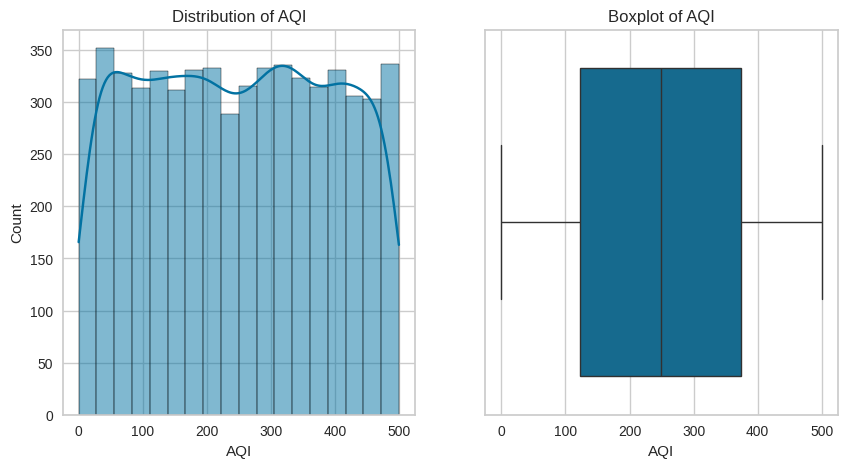

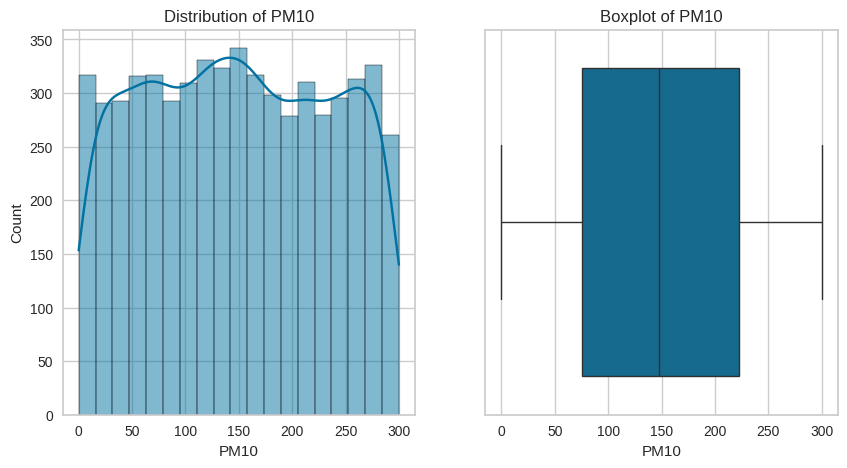

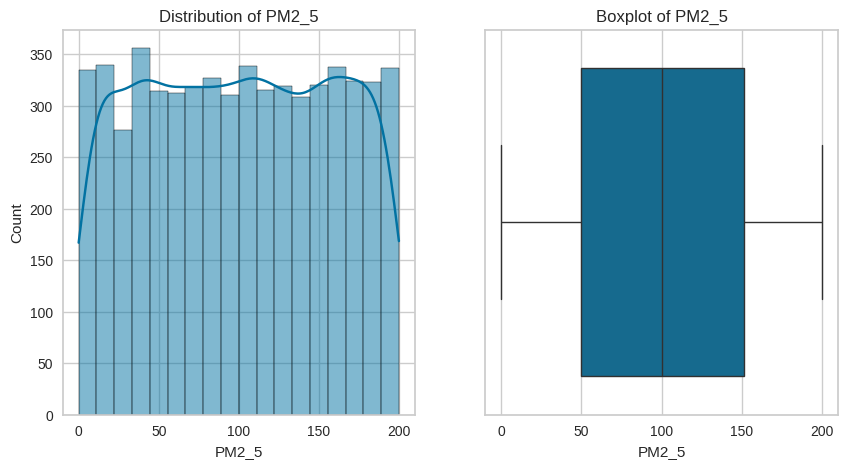

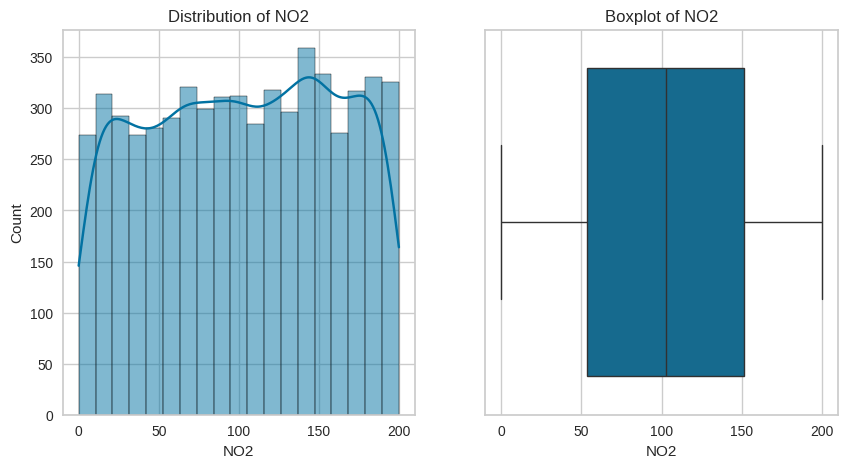

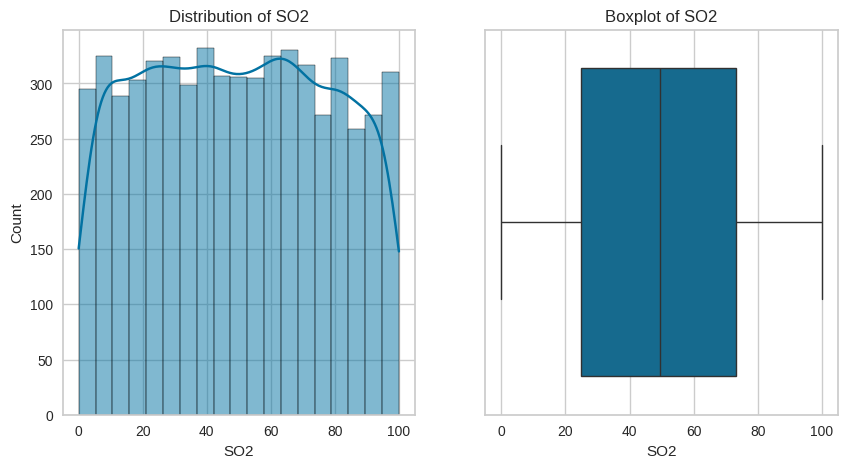

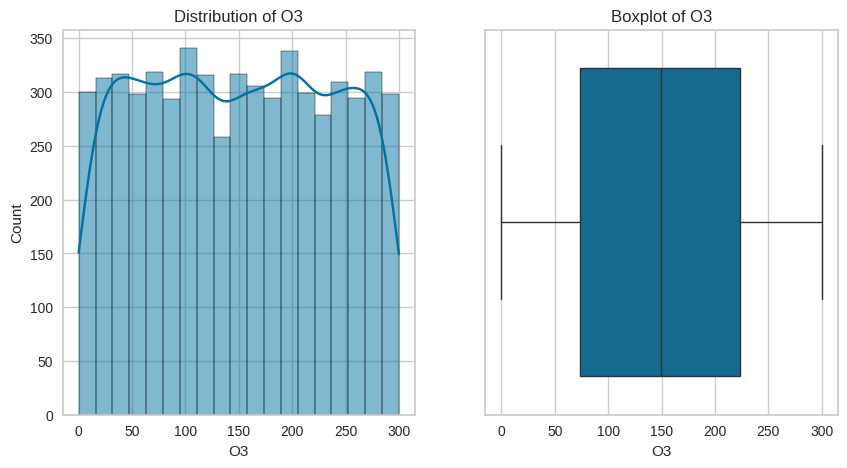

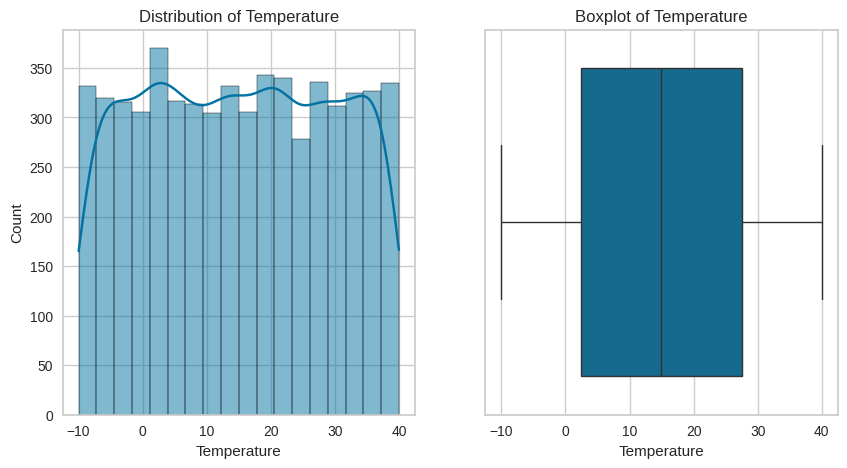

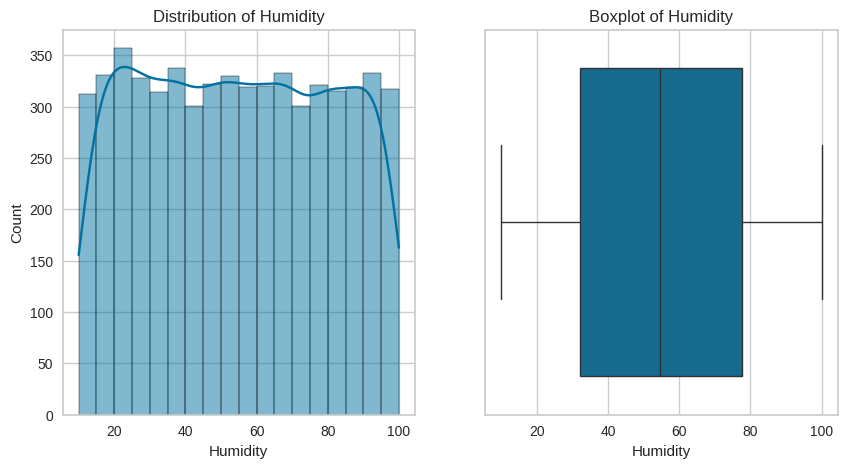

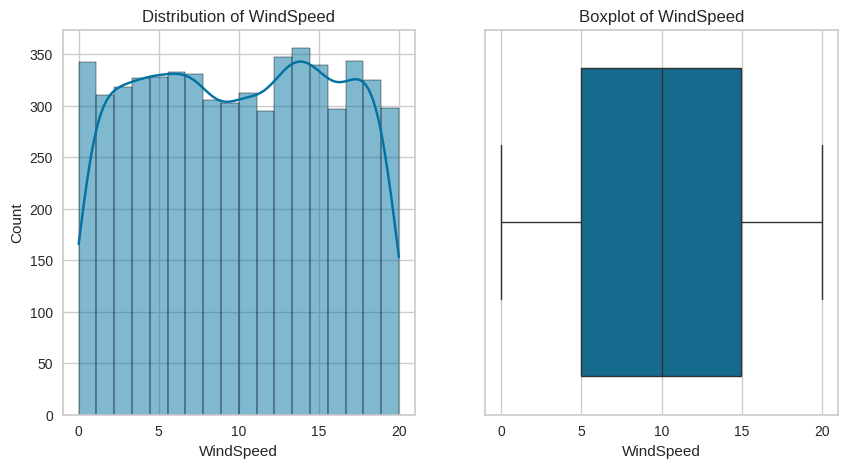

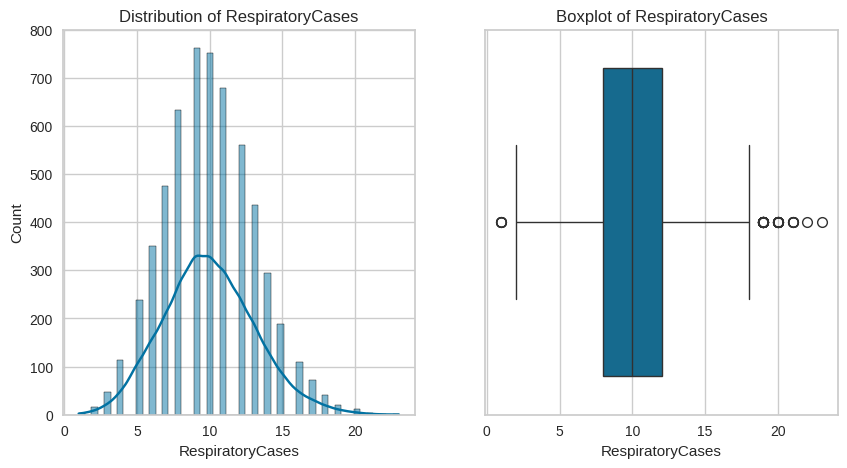

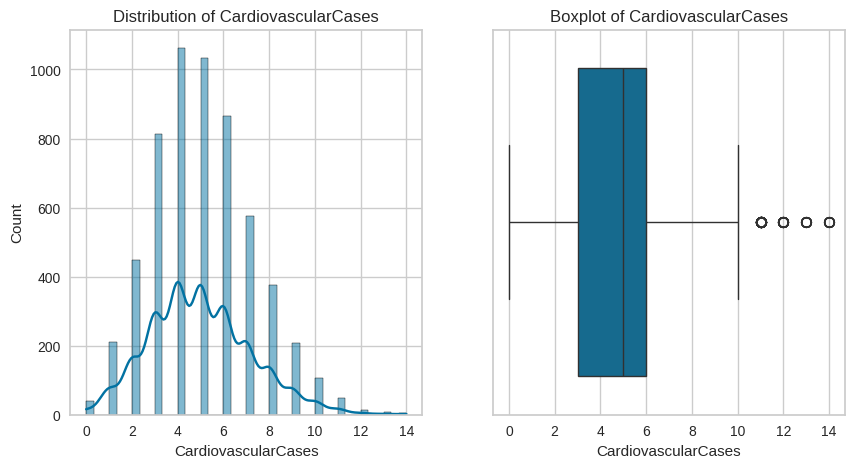

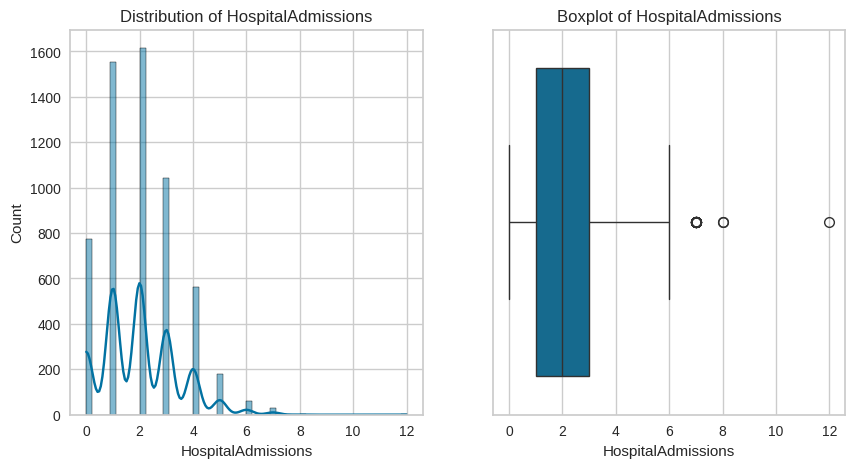

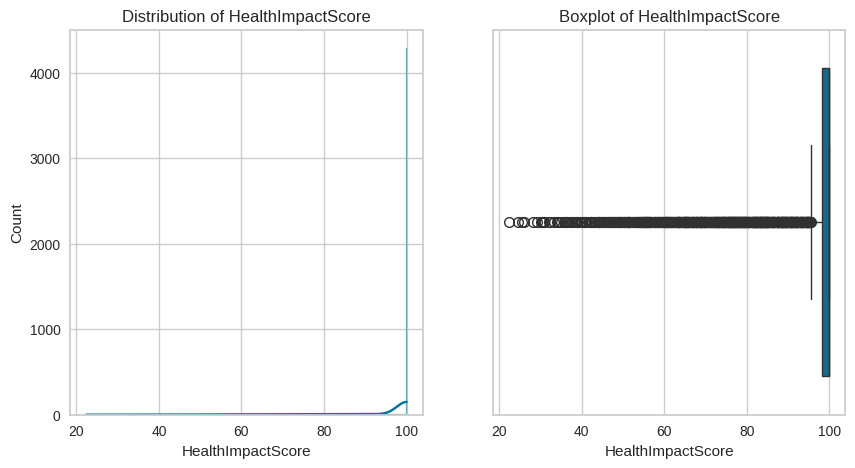

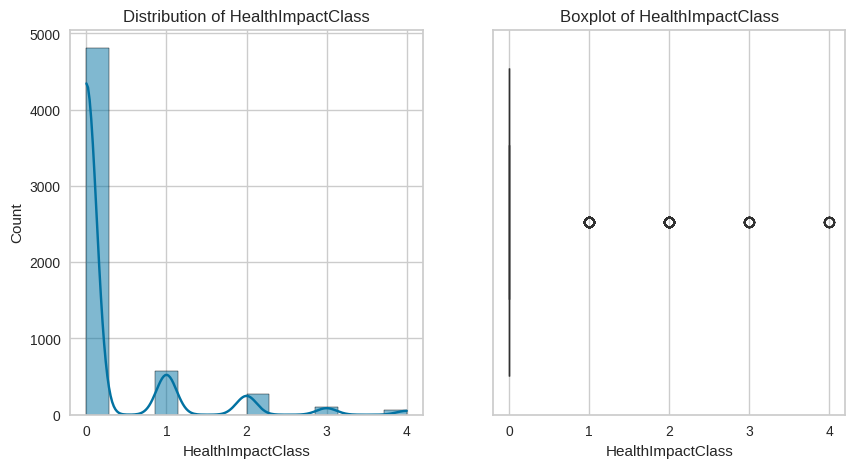

In [ ]:
plt.rcParams['axes.grid'] = True
plt.rcParams['savefig.transparent'] = True

for i, column in enumerate(df, 1):
    plt.figure(figsize=(10, 5))

    # Create histogram on the left side
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')

    # Create boxplot on the right side
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

<AxesSubplot: xlabel='HealthImpactScore', ylabel='Count'>

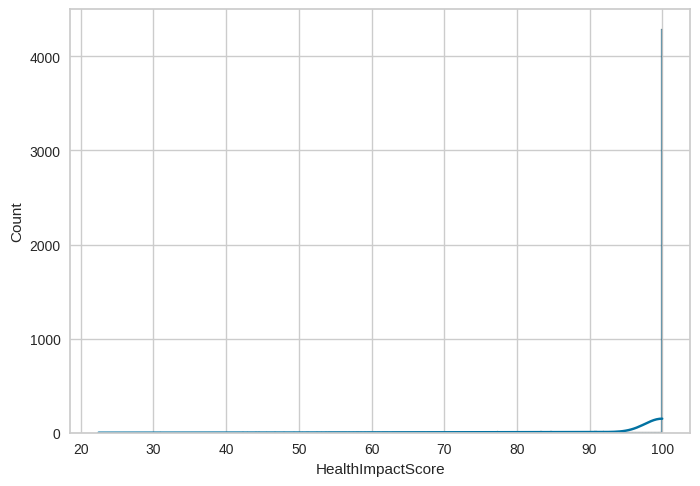

In [ ]:
sns.histplot(data=df, x='HealthImpactScore', kde=True)

In [ ]:
print(df['HealthImpactClass'].value_counts())

0.0    4808
1.0     579
2.0     273
3.0      95
4.0      56
Name: HealthImpactClass, dtype: int64


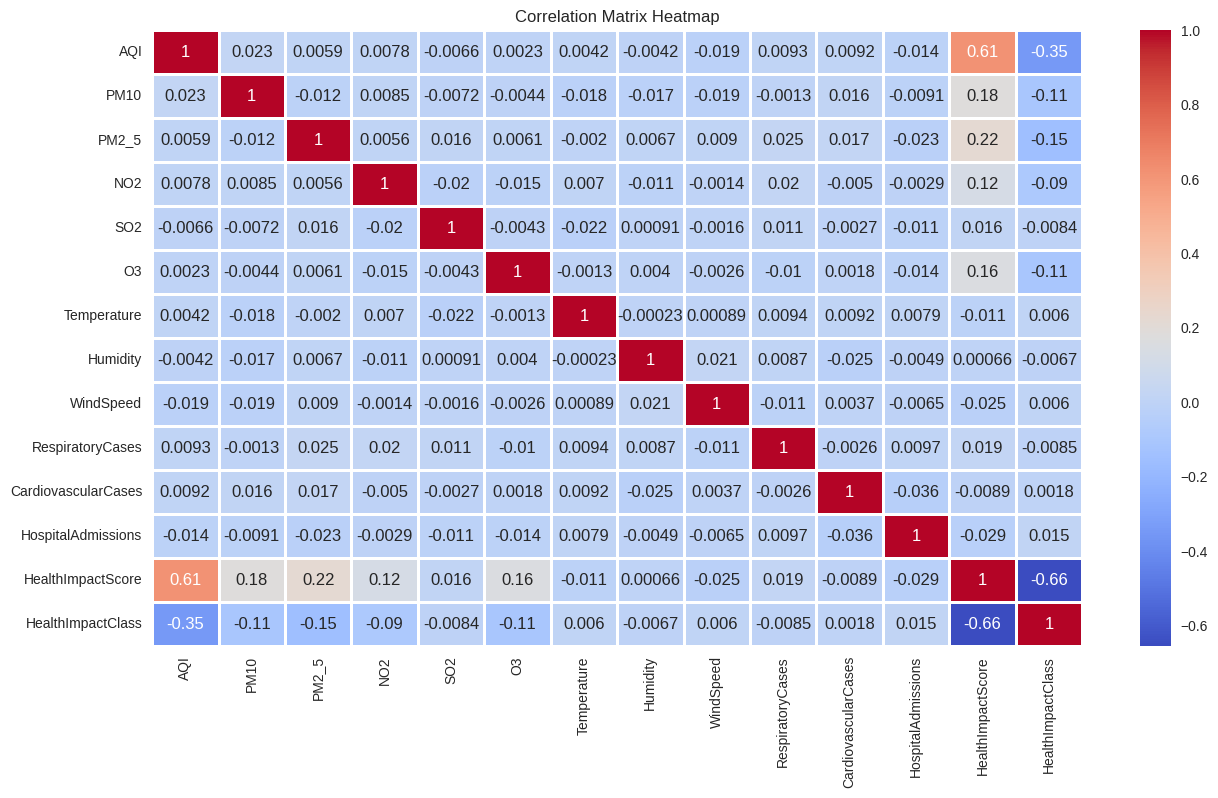

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidth=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix heatmap reveals some significant relationships between variables related to air quality and health impact. Importantly, the Air Quality Index (AQI) shows a strong positive correlation with the Health Impact Score (0.61), indicating that higher AQI levels are associated with higher health impact scores. Conversely, AQI is negatively correlated with the Health Impact Class (-0.35), suggesting that better air quality (lower AQI) relates to a better health impact classification.

PM2.5 also displays a moderate positive correlation with the Health Impact Score (0.22), implying that higher concentrations of PM2.5 are linked to higher health impact scores. Similarly, Hospital Admissions have a slight positive correlation with both Health Impact Score (0.16) and PM10 (0.18), indicating that higher levels of these pollutants may lead to an increase in hospital admissions.

In contrast, most of the other variables, including Temperature, Humidity, NO2, SO2, O3, Respiratory Cases, and Cardiovascular Cases, show very weak or no significant correlations with other variables. These values are close to zero, suggesting that these factors do not have a strong direct relationship with the measured health impacts in this dataset.

In [ ]:
# import lazypredict
# from lazypredict.Supervised import LazyRegressor
# from sklearn.model_selection import train_test_split

# X = df.drop(['HealthImpactScore','HealthImpactClass'], axis = 1)
# y= df['HealthImpactScore']

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)
# clf = LazyRegressor(verbose=0,ignore_warnings= False, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)

# models

In [ ]:
# from lazypredict.Supervised import LazyClassifier
# from sklearn.metrics import roc_auc_score

# X = df.drop(['HealthImpactScore','HealthImpactClass'], axis = 1)
# y= df['HealthImpactClass']

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)
# clf = LazyClassifier(verbose=0,ignore_warnings= False, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
# roc_auc_scores = {}

# for model_name, model in clf.models.items():
#     if hasattr(model, "predict_proba"):
#         y_pred_proba = model.predict_proba(X_test)
#         # Check if it is binary classification
#         if y_pred_proba.shape[1] == 2:
#             roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
#         else:
#             # For multi-class, use 'ovr' strategy
#             roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
#         roc_auc_scores[model_name] = roc_auc
#     else:
#         print(f"Model {model_name} does not support predict_proba, skipping ROC AUC calculation.")

# # print("\nROC AUC Scores:")
# # for model_name, roc_auc in roc_auc_scores.items():
# #     print(f"{model_name}: {roc_auc:.4f}")

# models['ROC AUC'] = models.index.map(roc_auc_scores)

# models

In [ ]:
# s = setup(df.drop('HealthImpactScore', axis = 1), target = 'HealthImpactClass', session_id = 123)

In [ ]:
exp = ClassificationExperiment()

exp.setup(df.drop('HealthImpactScore', axis = 1), target = 'HealthImpactClass', fold=5, max_encoding_ohe=0, session_id = 123)

,Description,Value
0,Session id,123
1,Target,HealthImpactClass
2,Target type,Multiclass
3,Original data shape,"(5811, 13)"
4,Transformed data shape,"(5811, 13)"
5,Transformed train set shape,"(4067, 13)"
6,Transformed test set shape,"(1744, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9068,0.8956,0.9068,0.8869,0.8928,0.6540,0.6628,3.0820
xgboost,Extreme Gradient Boosting,0.9058,0.8960,0.9058,0.8935,0.8924,0.6512,0.6595,0.4740
knn,K Neighbors Classifier,0.9021,0.8908,0.9021,0.8877,0.8891,0.6358,0.6443,0.1520
gbc,Gradient Boosting Classifier,0.8953,0.8890,0.8953,0.8777,0.8844,0.6188,0.6245,4.3140
rf,Random Forest Classifier,0.8943,0.8944,0.8943,0.8700,0.8750,0.5857,0.6035,0.8780
lr,Logistic Regression,0.8736,0.8988,0.8736,0.8299,0.8445,0.4731,0.5025,2.5020
qda,Quadratic Discriminant Analysis,0.8734,0.8895,0.8734,0.8388,0.8526,0.5064,0.5206,0.0260
et,Extra Trees Classifier,0.8621,0.9003,0.8621,0.8198,0.8262,0.3781,0.4309,0.3760
lda,Linear Discriminant Analysis,0.8557,0.8977,0.8557,0.7991,0.8183,0.3637,0.4040,0.0520
nb,Naive Bayes,0.8503,0.8966,0.8503,0.7936,0.8089,0.3224,0.3671,0.0520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9025,0.8756,0.9025,0.8795,0.8860,0.6275,0.6405


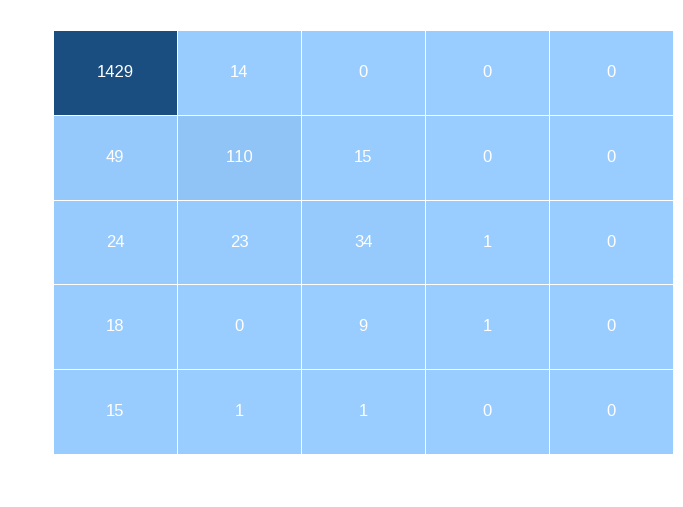

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pycaret.classification import *
from matplotlib.colors import LinearSegmentedColormap

# Assuming 'exp' is your setup and 'best' is your best model

# Generate predictions

predictions = exp.predict_model(best)

# Ensure the correct columns are used (adjust according to actual column names)
actual_labels = predictions['HealthImpactClass']
predicted_labels = predictions['prediction_label']

# Calculate confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Create a figure and axis
fig, ax = plt.subplots()

colors = [(0.6, 0.8, 1), (0.1, 0.3, 0.5)]  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list('custom_blue', colors)

# Plot the confusion matrix using seaborn for better customization
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, ax=ax,
            annot_kws={"color": "white"}, linewidths=.5, linecolor='white')

# Customize the plot with white text and borders
ax.set_facecolor('none')  # Set the background to be transparent
fig.patch.set_alpha(0)    # Set the figure background to be transparent

# Set labels, title, and ticks to white
ax.set_xlabel('Predicted labels', color='white')
ax.set_ylabel('True labels', color='white')
ax.set_title('LightGBM- Confusion Matrix', color='white')

# Change tick labels to white
ax.xaxis.set_tick_params(colors='white')
ax.yaxis.set_tick_params(colors='white')

# Change tick label text to white
plt.setp(ax.get_xticklabels(), color='white')
plt.setp(ax.get_yticklabels(), color='white')

# Change the color of the spines (borders) to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Save the plot as a PNG file with a transparent background
plt.savefig('LGBM_confusion_matrix_custom.png', transparent=True, bbox_inches='tight')

# Show the plot (optional)
plt.show()


In [ ]:
print(predictions.columns)

Index(['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity',
       'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactClass', 'prediction_label',
       'prediction_score'],
      dtype='object')


In [ ]:
predictions.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactClass,prediction_label,prediction_score
2427,477.959412,188.735275,3.859826,146.728806,3.117308,216.732422,21.524628,54.994968,16.269907,15,3,2,0.0,0,0.9996
3063,311.824402,277.395325,33.620510,80.989159,98.847626,137.517258,34.044788,39.425137,1.395319,6,4,4,0.0,0,0.9999
1417,61.054958,284.228394,165.535889,195.096405,97.906937,97.091301,-7.449266,94.945946,7.057730,7,5,2,0.0,0,0.9994
4103,87.323593,135.448776,10.194807,108.848923,18.848377,107.022812,32.549393,86.550697,14.269206,16,5,4,1.0,1,0.9834
1876,295.173859,93.510994,74.160843,119.091095,30.747593,137.152512,-8.362276,24.024374,19.800930,12,3,0,0.0,0,0.9972


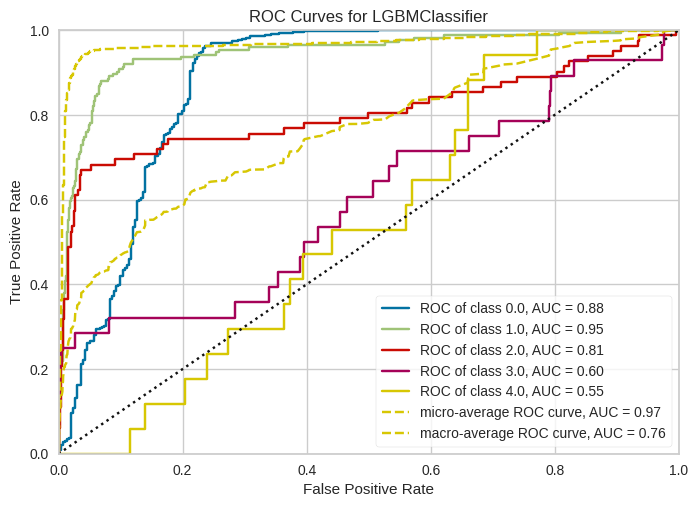

In [ ]:
exp.plot_model(best, plot='auc')

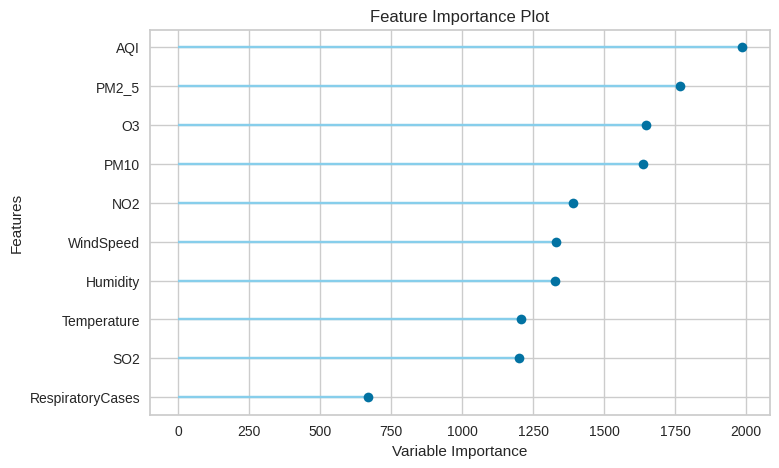

In [ ]:
exp.plot_model(best, plot = 'feature')

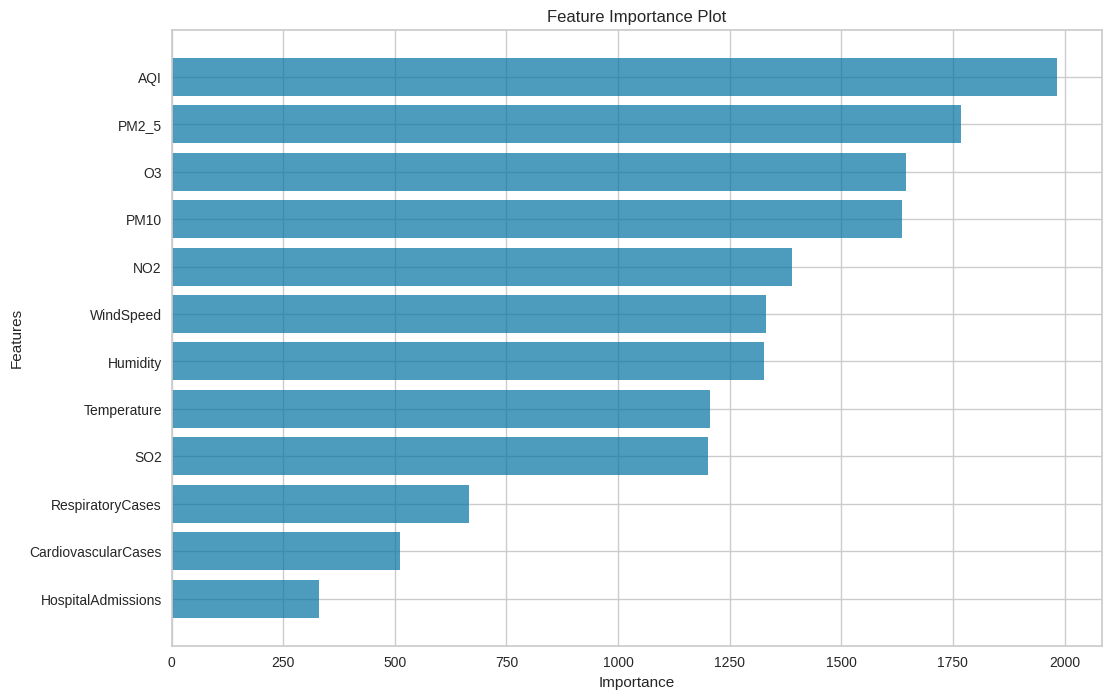

In [ ]:
feature_names = exp.get_config('X_train').columns

# Find Feature names and importance
if hasattr(best, 'feature_importances_'):
    feature_importance = best.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], alpha=0.7)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
feature_importance_df

,Feature,Importance
0,AQI,1984
2,PM2_5,1768
5,O3,1646
1,PM10,1636
3,NO2,1390
8,WindSpeed,1332
7,Humidity,1327
6,Temperature,1207
4,SO2,1201
9,RespiratoryCases,667


In [ ]:
feature_importance_df

,Feature,Importance
0,AQI,1984
2,PM2_5,1768
5,O3,1646
1,PM10,1636
3,NO2,1390
8,WindSpeed,1332
7,Humidity,1327
6,Temperature,1207
4,SO2,1201
9,RespiratoryCases,667


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9025,0.8756,0.9025,0.8795,0.8860,0.6275,0.6405


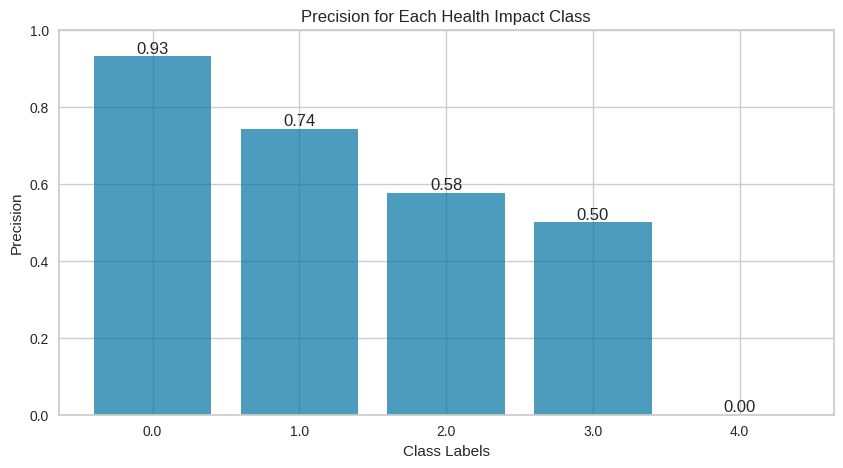

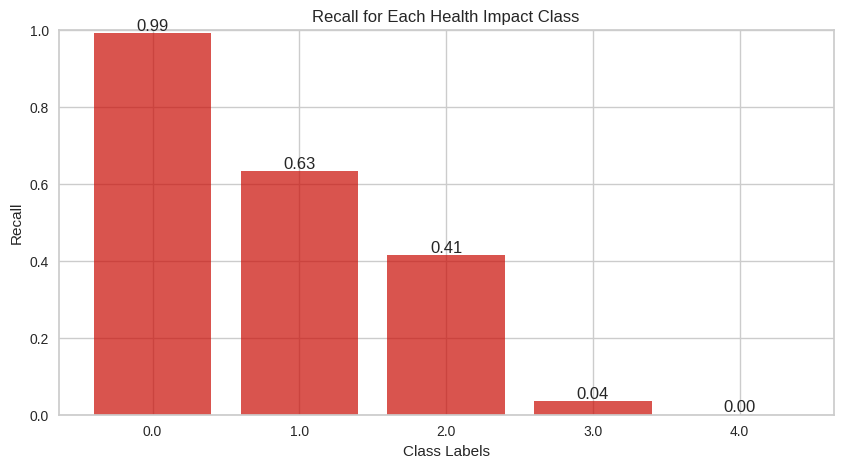

In [ ]:
# Generate predictions
predictions = exp.predict_model(best)

# Get the true labels and predicted labels
y_true = predictions['HealthImpactClass']
y_pred = predictions['prediction_label']

# Calculate precision and recall for each class
report = classification_report(y_true, y_pred, output_dict=True)


precision_values = []
recall_values = []
expected_classes = ['0.0', '1.0', '2.0','3.0','4.0']

# Print the report
for class_label in expected_classes:
    precision_values.append(report[class_label]['precision'])
    recall_values.append(report[class_label]['recall'])

# Plot precision bar chart
plt.figure(figsize=(10, 5))
plt.bar(expected_classes, precision_values, color='b', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Precision')
plt.title('Precision for Each Health Impact Class')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
for i in range(len(expected_classes)):
    plt.text(i, precision_values[i], f'{precision_values[i]:.2f}', ha='center', va='bottom')
plt.savefig('LGBMPrec.png', bbox_inches='tight')
plt.show()

# Plot recall bar chart
plt.figure(figsize=(10, 5))
plt.bar(expected_classes, recall_values, color='r', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Recall')
plt.title('Recall for Each Health Impact Class')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
for i in range(len(expected_classes)):
    plt.text(i, recall_values[i], f'{recall_values[i]:.2f}', ha='center', va='bottom')

plt.savefig('LGBMRecall.png', bbox_inches='tight')
plt.show()


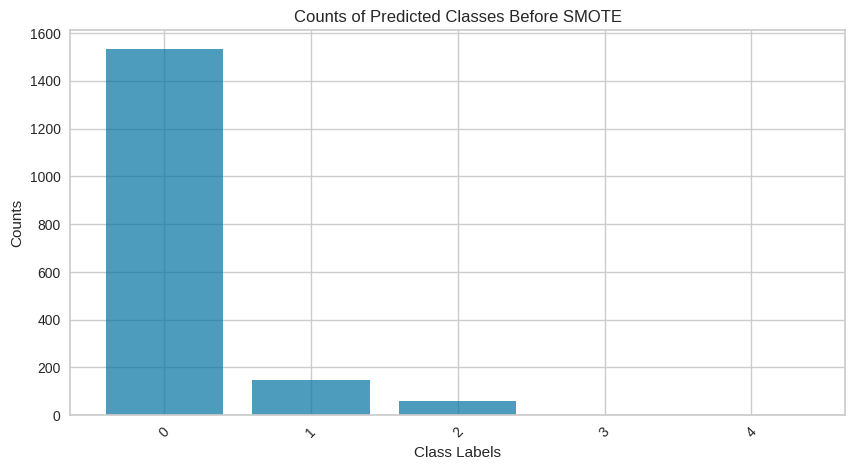

In [ ]:
plt.figure(figsize=(10, 5))

counts = y_pred.value_counts()
counts['4'] = 0
labels = ['0', '1', '2', '3', '4']  # Explicit x-axis labels

plt.bar(labels, counts, color='b', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.title('Counts of Predicted Classes Before SMOTE')
plt.xticks(rotation=45)  # Rotate x-ax is labels if necessary
plt.show()

In [ ]:
counts

0    1535
1     148
2      59
3       2
4       0
Name: prediction_label, dtype: int64

In [ ]:
# exp.setup(df.drop('HealthImpactScore', axis = 1), target = 'HealthImpactClass', fold=5, max_encoding_ohe=0, session_id = 123, fix_imbalance=True, fix_imbalance_method='smote')

In [ ]:
# best = exp.compare_models()

In [ ]:
# plot_model(best, plot = 'confusion_matrix')

In [ ]:
# plot_model(best, plot = 'auc')

In [ ]:
# import matplotlib.pyplot as plt

# feature_names = get_config('X_train').columns

# # Find Feature names and importance
# if hasattr(best, 'feature_importances_'):
#     feature_importance = best.feature_importances_
#     feature_importance_df = pd.DataFrame({
#         'Feature': feature_names,
#         'Importance': feature_importance
#     }).sort_values(by='Importance', ascending=False)

# # Plot feature importance
# plt.figure(figsize=(12, 8))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], alpha=0.7)
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance Plot')
# plt.gca().invert_yaxis()
# plt.show()

In [ ]:
# from sklearn.metrics import classification_report

# # Generate predictions
# predictions = predict_model(best)

# # Get the true labels and predicted labels
# y_true = predictions['HealthImpactClass']
# y_pred = predictions['prediction_label']

# # Calculate precision and recall for each class
# report = classification_report(y_true, y_pred, output_dict=True)


# precision_values = []
# recall_values = []
# expected_classes = ['0.0', '1.0', '2.0','3.0','4.0']

# # Print the report
# for class_label in expected_classes:
#     precision_values.append(report[class_label]['precision'])
#     recall_values.append(report[class_label]['recall'])

# # Plot precision bar chart
# plt.figure(figsize=(10, 5))
# plt.bar(expected_classes, precision_values, color='b', alpha=0.7)
# plt.xlabel('Class Labels')
# plt.ylabel('Precision')
# plt.title('Precision for Each Health Impact Class')
# plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
# for i in range(len(expected_classes)):
#     plt.text(i, precision_values[i], f'{precision_values[i]:.2f}', ha='center', va='bottom')
# plt.show()

# # Plot recall bar chart
# plt.figure(figsize=(10, 5))
# plt.bar(expected_classes, recall_values, color='r', alpha=0.7)
# plt.xlabel('Class Labels')
# plt.ylabel('Recall')
# plt.title('Recall for Each Health Impact Class')
# plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
# for i in range(len(expected_classes)):
#     plt.text(i, recall_values[i], f'{recall_values[i]:.2f}', ha='center', va='bottom')
# plt.show()


In [ ]:
X = df.drop(['HealthImpactClass', 'HealthImpactScore'] ,axis = 1)
y = df['HealthImpactClass']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size= 0.00000000000001,random_state= 123)

smote = SMOTETomek(random_state=123)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

pd.Series(y_train_over).value_counts()

3.0    4807
4.0    4807
2.0    4801
1.0    4794
0.0    4790
Name: HealthImpactClass, dtype: int64

In [ ]:
df2 = X_train_over
df2['HealthImpactClass'] = y_train_over
df2.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactClass
0,493.638065,15.812937,120.273525,106.293499,99.436898,186.534489,38.781006,48.477468,12.928562,9,3,2,0.0
1,36.898282,129.634871,148.546173,92.587467,64.445236,104.809561,-8.662055,93.338347,18.584660,21,4,0,1.0
2,385.813455,83.107635,88.420749,161.602284,35.388041,144.431795,1.014930,88.221649,16.125185,13,1,2,0.0
3,40.307703,10.724518,47.624414,193.918067,3.001049,258.376234,2.503386,68.060281,1.472411,13,3,3,1.0
4,422.391614,147.134729,155.797701,193.202419,86.387015,124.486120,27.704658,28.007975,7.503456,14,5,0,0.0


In [ ]:
clf1 = setup(data = df2,
             fold = 10,
             target = 'HealthImpactClass',
             fix_imbalance = True,
             fix_imbalance_method='smote',
             session_id = 123
            )

,Description,Value
0,Session id,123
1,Target,HealthImpactClass
2,Target type,Multiclass
3,Original data shape,"(23999, 13)"
4,Transformed data shape,"(24025, 13)"
5,Transformed train set shape,"(16825, 13)"
6,Transformed test set shape,"(7200, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9817,0.9994,0.9817,0.9819,0.9817,0.9771,0.9771,1.0900
rf,Random Forest Classifier,0.9735,0.9987,0.9735,0.9738,0.9735,0.9669,0.9669,2.7470
xgboost,Extreme Gradient Boosting,0.9685,0.9979,0.9685,0.9686,0.9683,0.9606,0.9607,1.3670
lightgbm,Light Gradient Boosting Machine,0.9592,0.9967,0.9592,0.9594,0.9590,0.9490,0.9492,7.7290
knn,K Neighbors Classifier,0.9126,0.9813,0.9126,0.9182,0.9050,0.8907,0.8948,0.2620
dt,Decision Tree Classifier,0.8891,0.9307,0.8891,0.8881,0.8876,0.8614,0.8618,0.2500
gbc,Gradient Boosting Classifier,0.8014,0.9533,0.8014,0.8047,0.8005,0.7518,0.7530,18.4430
qda,Quadratic Discriminant Analysis,0.6159,0.8761,0.6159,0.6157,0.6131,0.5198,0.5210,0.1330
nb,Naive Bayes,0.4721,0.7909,0.4721,0.4743,0.4524,0.3401,0.3472,0.1350
ada,Ada Boost Classifier,0.4589,0.7816,0.4589,0.4500,0.4447,0.3237,0.3279,1.0400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

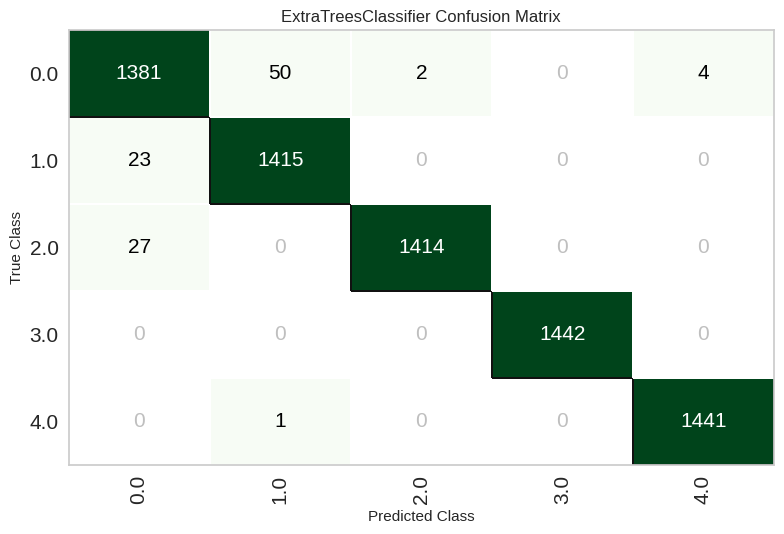

In [ ]:
plot_model(best, plot = 'confusion_matrix')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9851,0.9994,0.9851,0.9852,0.9852,0.9814,0.9814


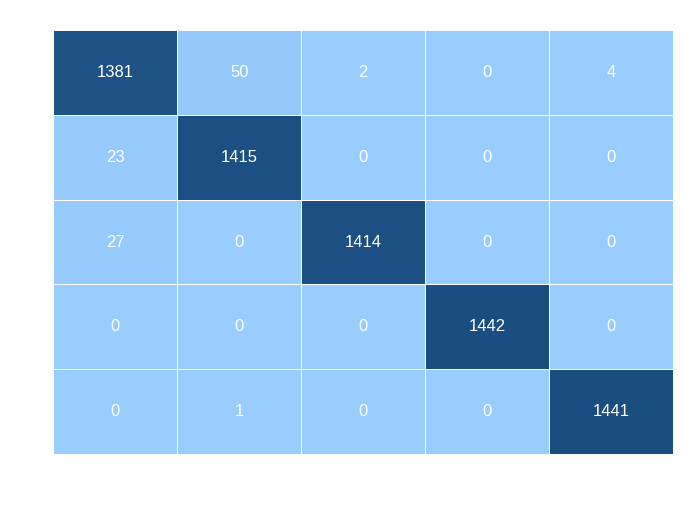

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pycaret.classification import *
from matplotlib.colors import LinearSegmentedColormap

# Assuming 'exp' is your setup and 'best' is your best model

# Generate predictions

predictions = predict_model(best)

# Ensure the correct columns are used (adjust according to actual column names)
actual_labels = predictions['HealthImpactClass']
predicted_labels = predictions['prediction_label']

# Calculate confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Create a figure and axis
fig, ax = plt.subplots()

colors = [(0.6, 0.8, 1), (0.1, 0.3, 0.5)]  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list('custom_blue', colors)

# Plot the confusion matrix using seaborn for better customization
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, ax=ax,
            annot_kws={"color": "white"}, linewidths=.5, linecolor='white')

# Customize the plot with white text and borders
ax.set_facecolor('none')  # Set the background to be transparent
fig.patch.set_alpha(0)    # Set the figure background to be transparent

# Set labels, title, and ticks to white
ax.set_xlabel('Predicted labels', color='white')
ax.set_ylabel('True labels', color='white')
ax.set_title('ET- Confusion Matrix', color='white')

# Change tick labels to white
ax.xaxis.set_tick_params(colors='white')
ax.yaxis.set_tick_params(colors='white')

# Change tick label text to white
plt.setp(ax.get_xticklabels(), color='white')
plt.setp(ax.get_yticklabels(), color='white')

# Change the color of the spines (borders) to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Save the plot as a PNG file with a transparent background
plt.savefig('ET_confusion_matrix_custom.png', transparent=True, bbox_inches='tight')

# Show the plot (optional)
plt.show()


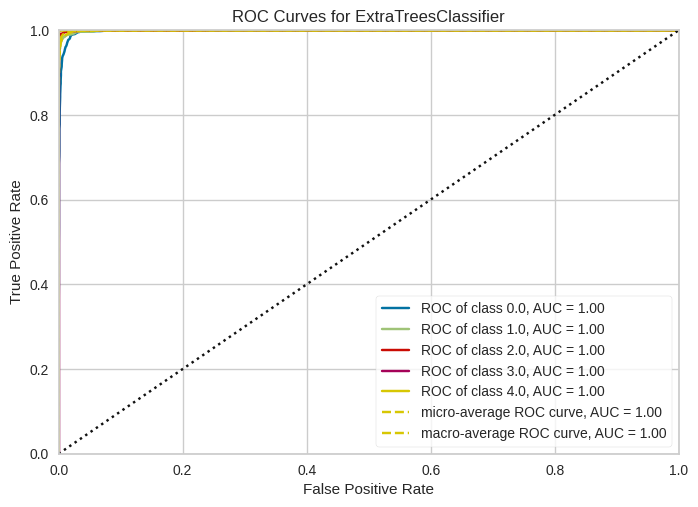

In [ ]:
plot_model(best, plot = 'auc')

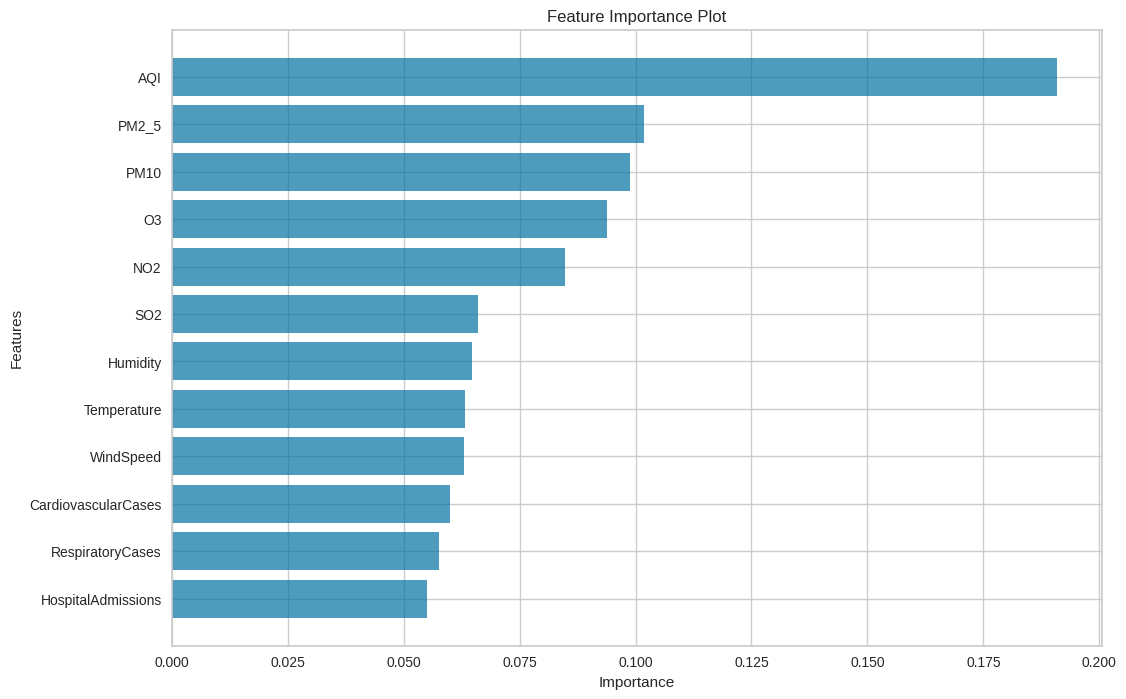

In [ ]:
feature_names = get_config('X_train').columns

# Find Feature names and importance
if hasattr(best, 'feature_importances_'):
    feature_importance = best.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], alpha=0.7)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
feature_importance_df

,Feature,Importance
0,AQI,0.190940
2,PM2_5,0.101732
1,PM10,0.098864
5,O3,0.093770
3,NO2,0.084839
4,SO2,0.066015
7,Humidity,0.064682
6,Temperature,0.063308
8,WindSpeed,0.063121
10,CardiovascularCases,0.060038


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9851,0.9994,0.9851,0.9852,0.9852,0.9814,0.9814


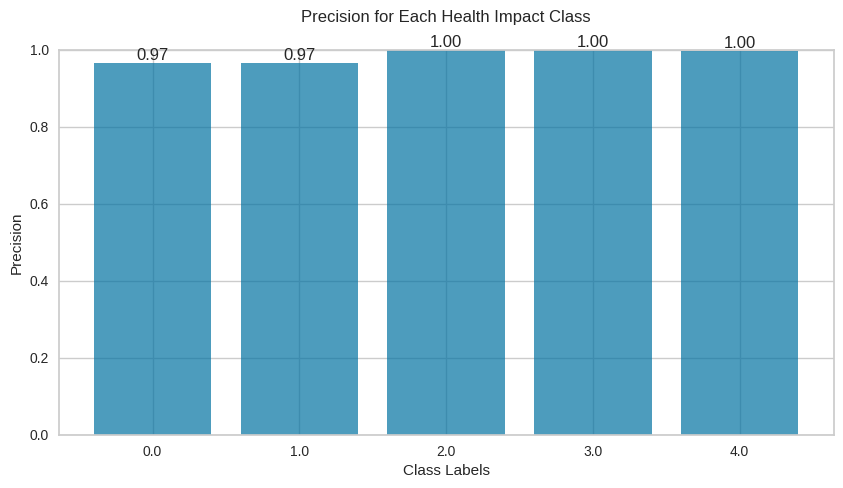

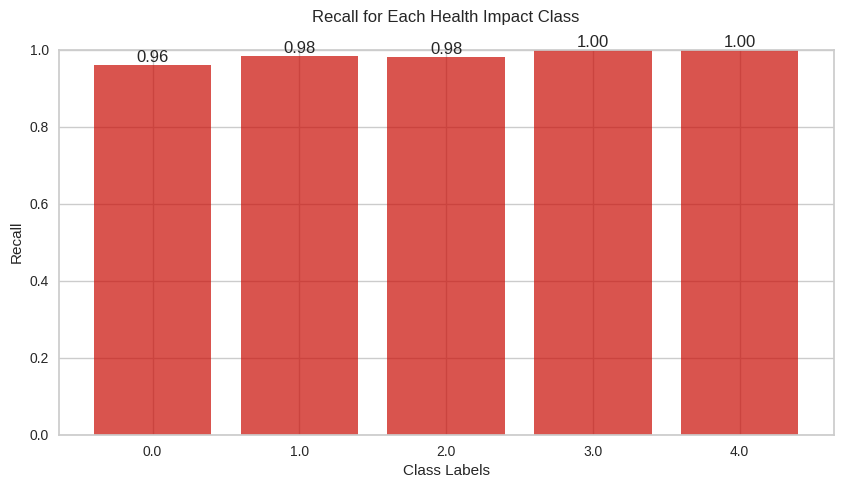

In [ ]:
# Generate predictions
predictions = predict_model(best)

# Get the true labels and predicted labels
y_true = predictions['HealthImpactClass']
y_pred = predictions['prediction_label']

# Calculate precision and recall for each class
report = classification_report(y_true, y_pred, output_dict=True)


precision_values = []
recall_values = []
expected_classes = ['0.0', '1.0', '2.0','3.0','4.0']

# Print the report
for class_label in expected_classes:
    precision_values.append(report[class_label]['precision'])
    recall_values.append(report[class_label]['recall'])

# Plot precision bar chart
plt.figure(figsize=(10, 5))
plt.bar(expected_classes, precision_values, color='b', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Precision')
plt.title('Precision for Each Health Impact Class', pad = 20)
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
for i in range(len(expected_classes)):
    plt.text(i, precision_values[i], f'{precision_values[i]:.2f}', ha='center', va='bottom')
plt.show()

# Plot recall bar chart
plt.figure(figsize=(10, 5))
plt.bar(expected_classes, recall_values, color='r', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Recall')
plt.title('Recall for Each Health Impact Class', pad = 20)
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
for i in range(len(expected_classes)):
    plt.text(i, recall_values[i], f'{recall_values[i]:.2f}', ha='center', va='bottom')
plt.show()


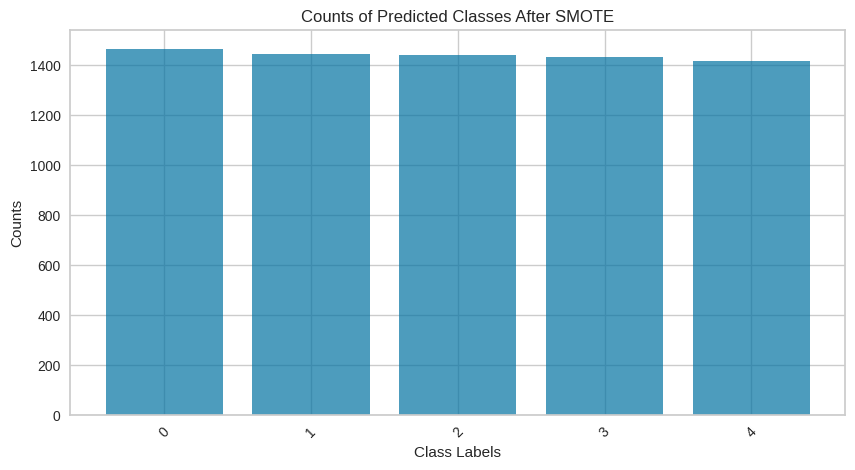

In [ ]:
plt.figure(figsize=(10, 5))

counts = y_pred.value_counts()
labels = ['0', '1', '2', '3', '4']  # Explicit x-axis labels

plt.bar(labels, counts, color='b', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.title('Counts of Predicted Classes After SMOTE')
plt.xticks(rotation=45)  # Rotate x-ax is labels if necessary
plt.show()

# Really worried about overfitting

In [ ]:
# tuned_dt = tune_model(best)

## **Conclusion**

The primary goal of this study was to determine whether we could accurately predict the Health Impact Class based on specific local atmospheric data. Our analysis utilized several machine learning models, including LightGBM and Extra Trees Classifier, which achieved high performance metrics. The LightGBM model showed an accuracy of 90.68%, while the Extra Trees Classifier achieved an impressive accuracy of 98.17%.

The analysis highlighted the importance of various features, such as pollutant concentrations and weather conditions, in predicting air quality and health impact. These findings provide valuable insights for policymakers and researchers to develop more effective pollution control strategies for human health.

Potential Limitation

One significant issue is the limited and biased data. The majority class, which is class 0.0, is heavily over-represented in the training data.
Another challenge is overfitting. To address the imbalance in our dataset, we synthetically generated new data to rebalance it. However, the imbalance in the distribution data can still lead to overfitting, where the model performs exceptionally well on training data but fails to generalize to new data.

Future Work

For the future works, we need to collect more data. This will help us address the issue of limited and biased data.
We also need to ensure that our model can handle large-scale data in a real-world environment. Incorporating more diverse datasets is crucial. By using data from different sources and with varying characteristics, we can make our model more reliable. Finally, Exploring additional features that influence air quality and health outcomes is also important. Identifying new and relevant features can significantly enhance the predictive power of our model.

In conclusion, our study could demonstrated the feasibility of predicting Health Impact Class using machine learning models on atmospheric data. In future work, we'll address the identified limitations by refining the data and model to handle larger, more diverse datasets, aiming to enhance accuracy and real-world applicability.